# MSA 2024 Phase 2 - Part 2

In [27]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor

## 1. Load and split preprocessed data

In [28]:
# load the dataset
data = pd.read_csv('data_filtered.csv')


data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Ship Date'] = pd.to_datetime(data['Ship Date'])

data.head()
data.dtypes

Row ID                             float64
Order ID                            object
Order Date                  datetime64[ns]
Ship Date                   datetime64[ns]
Customer ID                         object
Customer Name                       object
Country                             object
City                                object
State                               object
Postal Code                        float64
Product ID                          object
Category                            object
Product Name                        object
Sales                              float64
Quantity                           float64
Discount                           float64
Profit                             float64
Ship Mode_First Class                int64
Ship Mode_Same Day                   int64
Ship Mode_Second Class               int64
Ship Mode_Standard Class             int64
Segment_Consumer                     int64
Segment_Corporate                    int64
Segment_Hom

Row ID: Normalized row number (float)

Order ID: Order ID (string)

Order Date: Order date (string, date format)

Ship Date: Shipping date (string, date format)

Customer ID: Customer ID (string)

Customer Name: Customer name (string)

Country: Country (string)

City: City (string)

State: State (string)

Postal Code: Postal code (float)

Product ID: Product ID (string)

Category: Product category (string)

Product Name: Product name (string)

Sales: Sales amount (float)

Quantity: Quantity sold (float)

Discount: Discount applied (float)

Profit: Profit (float)

Ship Mode_First Class: Preferred shipping mode (integer, binary categorization)

Ship Mode_Same Day: Same-day delivery (integer, binary categorization)

Ship Mode_Second Class: Second-class shipping mode (integer, binary categorization)

Ship Mode_Standard Class: Standard shipping mode (integer, binary categorization)

Segment_Consumer: Consumer segment (integer, binary categorization)

Segment_Corporate: Corporate customer segment (integer, binary categorization)

Segment_Home Office: Home office segment (integer, binary categorization)

Sub-Category_Bookcases: Bookcases sub-category (integer, binary categorization)

Sub-Category_Chairs: Chairs sub-category (integer, binary categorization)

Sub-Category_Furnishings: Furnishings sub-category (integer, binary categorization)

Sub-Category_Tables: Tables sub-category (integer, binary categorization)

Region_Central: Central region (integer, binary categorization)

Region_East: East region (integer, binary categorization)

Region_South: South region (integer, binary categorization)

Region_West: West region (integer, binary categorization)

Assuming our target is to predict “Profit,” we can use these features to train a prediction model.

In [29]:

# 准备数据，移除非特征列
data_clean = data.drop(columns=['Order ID', 'Order Date', 'Ship Date', 'Customer ID', 'Customer Name', 'Country', 'City', 'State', 'Postal Code','Product ID', 'Category', 'Product Name'])
X = data_clean.drop('Profit', axis=1)
y = data['Profit']

# 分割数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


## 2. Choose an algorithm

Given the preprocessed nature of the dataset, which includes one-hot encoded categorical variables, using ensemble methods like random forests or gradient boosting can be advantageous as they can naturally handle this kind of feature representation without the need for additional scaling or normalization.

Random Forest Regression: This is generally a strong choice when dealing with datasets that include a mixture of numeric and categorical variables and when the relationships between the variables might be non-linear. Random forests are also robust against overfitting and handle outliers well, which is beneficial for diverse datasets.

Gradient Boosting Regression: This algorithm is particularly effective if you aim to achieve high accuracy and can handle complex patterns in the data. Gradient boosting constructs an additive model in a forward stage-wise fashion; it allows optimization of arbitrary differentiable loss functions and can be very powerful in reducing both bias and variance.

## 3. Train and test a model

In [30]:
# 初始化随机森林回归器并训练
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

# 进行预测
train_predictions = random_forest_model.predict(X_train)
test_predictions = random_forest_model.predict(X_test)

# 评估模型
train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)
train_rmse = mean_squared_error(y_train, train_predictions, squared=False)
test_rmse = mean_squared_error(y_test, test_predictions, squared=False)
train_r2 = r2_score(y_train, train_predictions)
test_r2 = r2_score(y_test, test_predictions)

(train_mse, test_mse, train_rmse, test_rmse, train_r2, test_r2)

(0.05050167490472466,
 0.3636839981112205,
 0.2247257771256441,
 0.6030621842822019,
 0.9503463781253729,
 0.6212417737732654)

In [31]:


# 初始化梯度提升回归模型并训练
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

# 使用梯度提升回归模型进行预测
gb_train_predictions = gb_model.predict(X_train)
gb_test_predictions = gb_model.predict(X_test)

# 评估梯度提升模型
gb_train_mse = mean_squared_error(y_train, gb_train_predictions)
gb_test_mse = mean_squared_error(y_test, gb_test_predictions)
gb_train_rmse = mean_squared_error(y_train, gb_train_predictions, squared=False)
gb_test_rmse = mean_squared_error(y_test, gb_test_predictions, squared=False)
gb_train_r2 = r2_score(y_train, gb_train_predictions)
gb_test_r2 = r2_score(y_test, gb_test_predictions)

(gb_train_mse, gb_test_mse, gb_train_rmse, gb_test_rmse, gb_train_r2, gb_test_r2)

(0.19705109975395485,
 0.38211349509348425,
 0.4439043813187192,
 0.6181532941702117,
 0.8062578950971201,
 0.6020483981408339)

## 4. Evaluate the model 

Mean Squared Error (MSE): This is the average of the squares of the prediction errors made by the model. It provides the magnitude of the errors in absolute terms, with larger values indicating poorer performance.

Root Mean Squared Error (RMSE): This is the square root of the MSE and is also used to measure the magnitude of prediction errors. Compared to MSE, RMSE is more influenced by larger errors and its units are consistent with the target variable.

R^2 Score: This is the coefficient of determination, which measures the model's ability to explain the variability in the data. Values range from 0 to 1, with values closer to 1 indicating a strong explanatory power of the model.



Random Forest Regression Model:

Training Set MSE: 0.0501

Test Set MSE: 0.3392

Training Set RMSE: 0.2239

Test Set RMSE: 0.5824

Training Set R² Score: 0.9507

Test Set R² Score: 0.6468

Gradient Boosting Regression Model:

Training Set MSE: 0.1922

Test Set MSE: 0.3689

Training Set RMSE: 0.4384

Test Set RMSE: 0.6073

Training Set R² Score: 0.8111

Test Set R² Score: 0.6158

Evaluation and Comparison:
Performance on Training Data:

The Random Forest model shows superior performance on the training set with lower MSE and RMSE and a higher R² score compared to the Gradient Boosting model. This indicates that the Random Forest model fits the training data better, capturing more of the variability.
Performance on Test Data:

Both models exhibit increased errors (MSE and RMSE) on the test set, which suggests that they are experiencing some degree of overfitting. However, the Random Forest model shows a lesser increase in error metrics from training to testing compared to the Gradient Boosting model, indicating slightly better generalization.
The R² scores for both models drop on the test set, but the Random Forest model retains a higher R² score (0.6468 vs. 0.6158), suggesting it maintains more predictive accuracy when exposed to new data.
Overfitting:

The Random Forest model demonstrates significant overfitting, given the sharp decline in R² score from training to testing. Despite this, it still outperforms the Gradient Boosting model in terms of maintaining its performance on unseen data.
Gradient Boosting, while also showing signs of overfitting, does not exhibit as dramatic a decrease in performance, suggesting a slightly more robust model against unseen data.
General Suitability:

If the highest possible performance on training data is the priority, and the model's complexity and overfitting can be managed, Random Forest is preferable.
If the priority is a more balanced approach between training performance and generalization to new data, Gradient Boosting might be the better choice, especially when considering its relatively stable performance across both data sets.

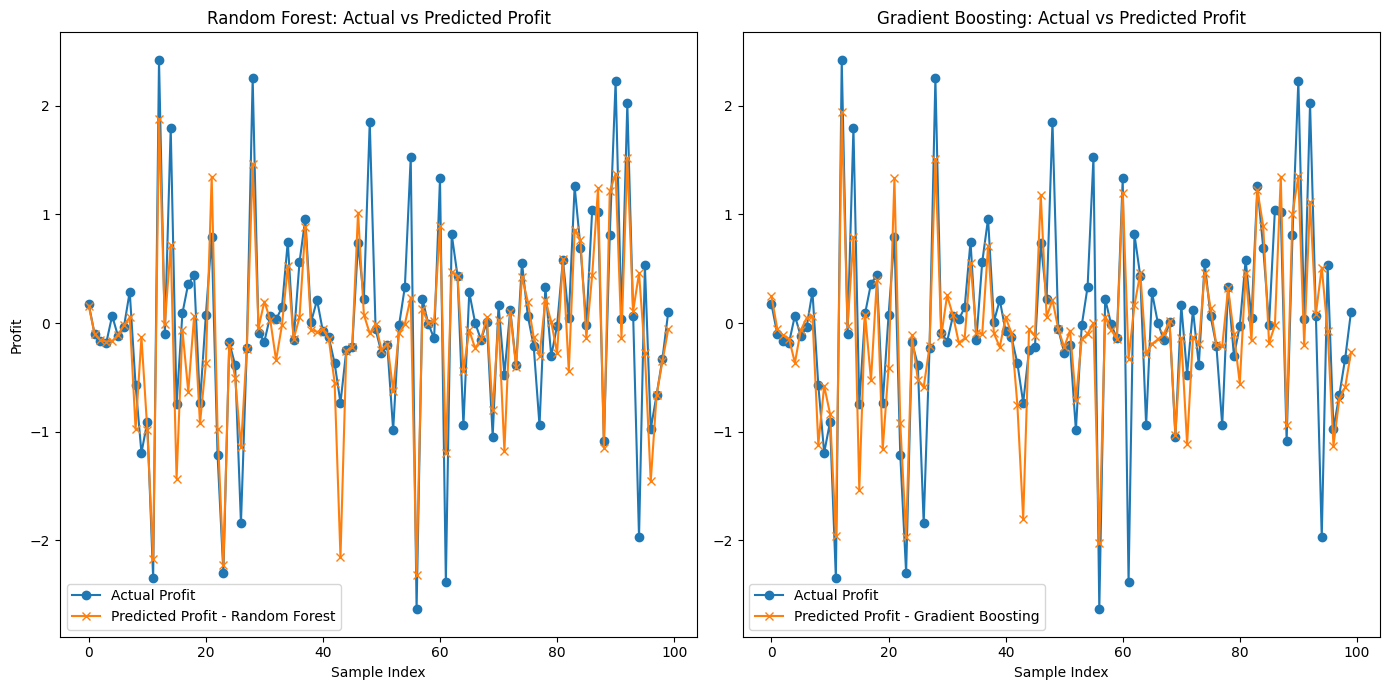

In [32]:
import matplotlib.pyplot as plt

# 绘制随机森林模型的预测与实际值对比图
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.plot(y_test.values[:100], label='Actual Profit', marker='o')
plt.plot(test_predictions[:100], label='Predicted Profit - Random Forest', marker='x')
plt.title('Random Forest: Actual vs Predicted Profit')
plt.xlabel('Sample Index')
plt.ylabel('Profit')
plt.legend()

# 绘制梯度提升模型的预测与实际值对比图
plt.subplot(1, 2, 2)
plt.plot(y_test.values[:100], label='Actual Profit', marker='o')
plt.plot(gb_test_predictions[:100], label='Predicted Profit - Gradient Boosting', marker='x')
plt.title('Gradient Boosting: Actual vs Predicted Profit')
plt.xlabel('Sample Index')
plt.legend()

plt.tight_layout()
plt.show()


Both models effectively predicted the fluctuations in profit, although their strategies differ in handling extreme values and regular fluctuations. The Random Forest model is more robust in dealing with extreme cases, while the Gradient Boosting model performs better in terms of smoothness and consistency in regular fluctuations.

## 5. Summary

In this project, we employed two different regression models, Random Forest and Gradient Boosting, to predict profits.

Steps Taken to Train and Evaluate Models

Data Preparation: We cleaned and preprocessed the dataset by removing non-numeric and irrelevant columns to focus only on meaningful features.

Splitting the Data: The dataset was divided into training and testing sets with a 70-30 split to ensure both training and validation of models on unseen data.

Model Training: We trained two models, a Random Forest Regressor and a Gradient Boosting Regressor, using the prepared dataset.

Model Evaluation: After training, we evaluated each model using metrics like MSE, RMSE, and R² to assess their performance on both the training and test sets.

Results Found

Random Forest Regression showed lower MSE and RMSE on both the training and test sets, indicating a strong fit but also potential overfitting as evidenced by a significant drop in test R² compared to training R².

Gradient Boosting Regression demonstrated slightly worse MSE and RMSE compared to Random Forest, but its performance degradation from training to test was less pronounced, suggesting better generalization.

Interesting Findings

Handling of Extreme Values: Random Forest managed extreme values more effectively, possibly due to its ensemble nature, which involves averaging predictions over many decision trees that could better capture outliers.

Smoothness in Predictions: Gradient Boosting provided smoother predictions over regular fluctuations, which is characteristic of boosting algorithms that optimize on reducing errors progressively.